In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ccm = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/CCM_cleaned_for_class.dta?raw=true')

## Data Exploration

Let's explore the dataset. The main issue here is how many variables there are. Simply printing the data is actually hard:

In [3]:
ccm.head() # see? between state and tnic3hhi, it'll jump variables

,gvkey,fyear,datadate,lpermno,gsector,sic,sic3,age,tic,state,...,tnic3hhi,tnic3tsimm,prodmktfluid,delaycon,equitydelaycon,debtdelaycon,privdelaycon,l_emp,l_ppent,l_laborratio
0,1000,1975.0,1975-12-31,25881.0,,3089.0,308.0,0.0,AE.2,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719789,2.111788,1.930200
1,1000,1976.0,1976-12-31,25881.0,,3089.0,308.0,1.0,AE.2,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900161,2.858766,2.421281
2,1000,1977.0,1977-12-31,25881.0,,3089.0,308.0,2.0,AE.2,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008323,3.040562,2.437114
3,1001,1983.0,1983-12-31,10015.0,25,5812.0,581.0,0.0,AMFD.,OK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869618,2.255074,1.817871
4,1001,1984.0,1984-12-31,10015.0,25,5812.0,581.0,1.0,AMFD.,OK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.917090,2.618490,2.135985


In [4]:
ccm.info() # Strings: gsector, tic, state. All others are number types. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223001 entries, 0 to 223000
Data columns (total 42 columns):
gvkey                223001 non-null int32
fyear                223001 non-null float64
datadate             223001 non-null datetime64[ns]
lpermno              223001 non-null float64
gsector              223001 non-null object
sic                  223001 non-null float32
sic3                 223001 non-null float32
age                  220369 non-null float32
tic                  223001 non-null object
state                223001 non-null object
at                   223001 non-null float64
me                   219397 non-null float32
l_a                  222978 non-null float32
l_sale               218779 non-null float32
prof_a               217167 non-null float32
mb                   219269 non-null float32
ppe_a                218189 non-null float32
xrd_a                223001 non-null float32
cash_a               222332 non-null float32
div_d                206688 non-

In [5]:
ccm.describe().transpose() # by transposing it, I can see more variables

,count,mean,std,min,25%,50%,75%,max
gvkey,223001.0,32958.763073,47791.277439,1000.000000,6461.000000,11946.000000,29306.000000,3.160560e+05
fyear,223001.0,1994.721737,10.396766,1975.000000,1986.000000,1995.000000,2003.000000,2.014000e+03
lpermno,223001.0,59497.471949,26609.226876,10000.000000,37218.000000,68073.000000,81740.000000,9.343600e+04
sic,223001.0,4667.958496,1952.305420,100.000000,3341.000000,4512.000000,6036.000000,9.997000e+03
sic3,223001.0,466.608093,195.235336,10.000000,334.000000,451.000000,603.000000,9.990000e+02
age,220369.0,8.776212,8.332827,0.000000,2.000000,6.000000,13.000000,3.900000e+01
at,223001.0,5113.074467,55838.117653,0.000000,32.347000,163.060000,957.000000,3.771200e+06
me,219397.0,2041.148438,11469.681641,0.000000,23.911125,110.921997,608.582275,6.265504e+05
l_a,222978.0,5.226964,2.408634,-6.907755,3.476993,5.094452,6.864064,1.514290e+01
l_sale,218779.0,4.778392,2.446945,-6.907755,3.243959,4.763113,6.381867,1.307274e+01


### Observations

- There are a lot of missing variables! Worthy of more investigation...
- Some firms have zero assets, market equity
- What does it mean to have negative debt or dividends?
- Tax rates range from 0 to 1!
- `Taxlosscarry` variables are booleans (1 or 0) as is `longdebtdum`

In [6]:
ccm.columns

Index(['gvkey', 'fyear', 'datadate', 'lpermno', 'gsector', 'sic', 'sic3',
       'age', 'tic', 'state', 'at', 'me', 'l_a', 'l_sale', 'prof_a', 'mb',
       'ppe_a', 'xrd_a', 'cash_a', 'div_d', 'td', 'td_a', 'td_mv', 'dltt_a',
       'dv_a', 'invopps_FG09', 'sales_g', 'short_debt', 'long_debt_dum', 'atr',
       'smalltaxlosscarry', 'largetaxlosscarry', 'tnic3hhi', 'tnic3tsimm',
       'prodmktfluid', 'delaycon', 'equitydelaycon', 'debtdelaycon',
       'privdelaycon', 'l_emp', 'l_ppent', 'l_laborratio'],
      dtype='object')

### Looking for outliers

There are a lot of ways to go about this. 
- table, but print out percentiles that focus on the tails and look for large jumps near the edges (like from p95 to max)
- make a table with skewness and kurtosis variables (look for fat and/or long tails)
- boxplots, but you'll need to do a bunch of them
- If you "standardize" all variables (subtract the mean and divide by the standard deviation - a common first step in many ML analyses!), you could plot the densities on a handful of charts or a tall ridgeline. Histograms might be better to spot outliers but would require ~40 figures.

Some variables I'd be concerned about (not an exhaustive list!):
- The leverage variables that start with `td` and `dltt`
- Sales growth
- Profitability
- Market-to-Book

In [7]:
# a table approach to support the list of variables above
ccm.describe(percentiles=[.01,.05,.95,.99]).transpose().style.format('{:.2f}')

,count,mean,std,min,1%,5%,50%,95%,99%,max
gvkey,223001.00,32958.76,47791.28,1000.00,1235.00,2085.00,11946.00,156613.00,186230.00,316056.00
fyear,223001.00,1994.72,10.40,1975.00,1975.00,1977.00,1995.00,2011.00,2013.00,2014.00
lpermno,223001.00,59497.47,26609.23,10000.00,10256.00,11438.00,68073.00,90339.00,92502.00,93436.00
sic,223001.00,4667.96,1952.31,100.00,1040.00,1381.00,4512.00,7830.00,8734.00,9997.00
sic3,223001.00,466.61,195.24,10.00,104.00,138.00,451.00,783.00,873.00,999.00
age,220369.00,8.78,8.33,0.00,0.00,0.00,6.00,26.00,35.00,39.00
at,223001.00,5113.07,55838.12,0.00,1.50,4.43,163.06,11540.60,71923.65,3771199.85
me,219397.00,2041.15,11469.68,0.00,1.10,3.66,110.92,7204.16,38432.21,626550.38
l_a,222978.00,5.23,2.41,-6.91,0.42,1.49,5.09,9.35,11.18,15.14
l_sale,218779.00,4.78,2.45,-6.91,-1.67,0.79,4.76,8.80,10.39,13.07


### Missing values

Below is a list of variables that are missing values for more than 10% of the dataset. Future work will need to understand why there are missing values and understand whether and how we should deal with them.

In [8]:
(
    ( # these lines do the calculation - what % of missing values are there for each var
        ccm.isna()      # ccm.isna() TURNS every obs/variable = 1 when its missing and 0 else
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(ccm)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    # you can stop here and report this...
    # but I wanted to format it a bit...
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') # the next line only works on a frame, and because pandas sees only 1 variable at this pt
    .style.format("{:.1f}")     # in the code, it calls this a "series" type object, so convert it to dataframe type object
)
#

,% missing
privdelaycon,74.4
debtdelaycon,74.4
equitydelaycon,74.4
delaycon,74.4
prodmktfluid,60.4
tnic3tsimm,56.5
tnic3hhi,56.5
largetaxlosscarry,33.5
smalltaxlosscarry,33.5
invopps_FG09,13.0


### Bonus - an "informative" but UGLY spaghetti chart.

One way you could investigate why those variables are missing. Maybe it's a data issue, as if some data for variable $x$ isn't available in all years. E.g. perhaps a variable isn't available before 1995 for some reason.

A way you could get a start on that is to plot the % missing by year for each variable. This legend is UGGGGLY, because the plot has 40+ series, which is why it's a **spaghetti chart**. It would take extra work to unravel the spaghetti and figure out what variables are what. But CLEARLY some variables only become available in 1995 so they can be used after that.

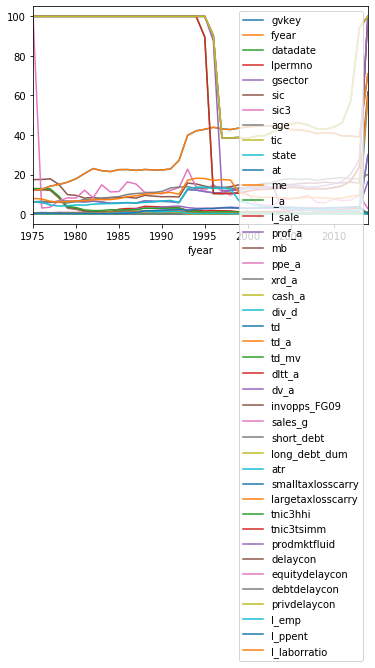

In [9]:
(
ccm
    .groupby('fyear').apply(lambda x: 100*(x.isna().sum(axis=0))  / len(x) ) 
    #.style.format("{:.0f}") # using this instead of the next line --> table instead of graph
    .plot.line()
)

## Case studies

### Summary stats on `Change in Profitability`

This is for the whole dataset:

In [10]:
(
    ccm
        .sort_values(['gvkey','fyear']) # make sure we sort first (you don't want to do Prof_2003-Prof_1991 if its not sorted!)
        .groupby(['gvkey'])
        ['prof_a'].diff()
        .describe()
)  

count    194996.000000
mean         -0.012433
std           0.919447
min        -217.922943
25%          -0.031885
50%          -0.000531
75%           0.024227
max         178.563995
Name: prof_a, dtype: float64

### Looking at how the 00s treated four firms

I filter to the 2000s decade and decided to examine 
- two banks: Wells Fargo (WFC) and JP Morgan (JPM)
- a future giant: Amazon (AMZN)
- a first wave tech firm whose resale model might fair well in recessions (EBAY)

I looked at change in profits, log sales, and leverage. 


In [11]:
subsample = (ccm
        .query('fyear >= 2000 & fyear <= 2010 & tic in ["WFC","JPM","AMZN","EBAY"]')
        .sort_values(['gvkey','fyear']) # make sure we sort first (you don't want to do Prof_2003-Prof_1991 if its not sorted!)
        )
subsample['prof_change'] = subsample.groupby(['gvkey'])['prof_a'].diff()


Text(0.5, 1.0, 'Change in Profitability')

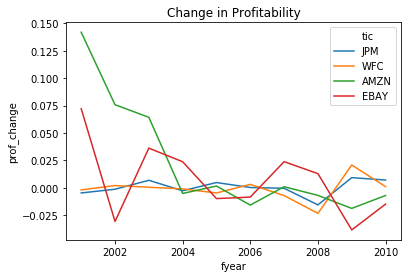

In [12]:
sns.lineplot(data=subsample,x='fyear',y='prof_change',hue='tic').set_title("Change in Profitability")

Amazon's early decade profitability was atypical. It would appear that around 2003, they shifted to a model emphasizing growth in market share over profits. I also suspect that tax avoidance strategies suppressed reported profits.

The banks, unsurprisingly, fared worst in 2008. Meanwhile, EBAY surged in 2007-2008 in the early face of the Great Recession. 

The next graph looks a log sales, and here we see Amazon's steady march upwards. The banks sales struggled markedly in the recession, as did EBAY. 

Text(0.5, 1.0, 'Log Sales')

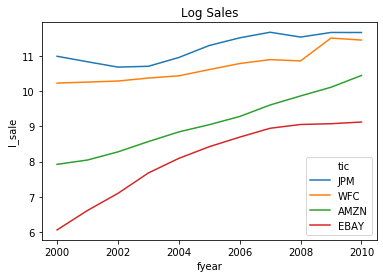

In [13]:
sns.lineplot(data=subsample,x='fyear',y='l_sale',hue='tic').set_title("Log Sales")

Finally, leverage. I plotted both book and market leverage, which is often similar but in some cases can differ dramatically. One instance of this is Amazon: Their debt levels exceeded book assets in 2001, but at the same time, their stock price was pricing in a lot of growth such that debt values plus market value greatly exceeded asset values. That's why the second chart shows much lower debt levels. 

The charts also highlight the way in which debt level vary across industries: Tech firms tend to be equity dominated, while banks are highly levered. In the early reaction to the onset of the recession, both banks took on more debt. 

Text(0.5, 1.0, 'Market Leverage')

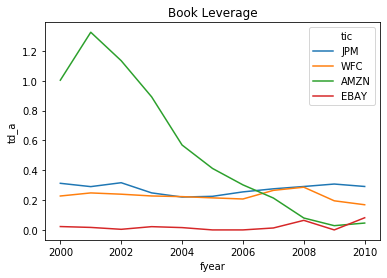

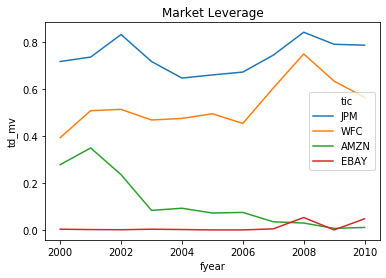

In [14]:
sns.lineplot(data=subsample,x='fyear',y='td_a',hue='tic').set_title("Book Leverage")
plt.figure()
sns.lineplot(data=subsample,x='fyear',y='td_mv',hue='tic').set_title("Market Leverage")

# Financial leverage during the crisis

First, let's get average leverage and book value for each industry (SIC2) and year during the decade around the crisis. 

In [15]:
ccm['sic3'] = pd.to_numeric(ccm['sic3'], errors='coerce')

In [16]:
sic2_year = (ccm
    .assign(sic2 = ccm['sic3']//10) 
    .query('fyear >= 2003 & fyear <= 2013 & sic2 != 99 & sic2 != 41')
    .groupby(['sic2','fyear'])
    [['td_a','prof_a']].mean()
)

The average industry-year has an average leverage of 25.7% and profit of 10.9%.

In [17]:
sic2_year.describe()

,td_a,prof_a
count,753.000000,753.000000
mean,0.251823,0.107818
std,0.114062,0.169036
min,0.000000,-0.500671
25%,0.164179,0.068826
50%,0.238158,0.105719
75%,0.336652,0.135971
max,0.577329,2.166625


### Tracking a few industries around the crisis

Let's find the four industries with the highest average leverage in 2007 and the four industries with the lowest average leverage in 2007. The table below shows that the lowest leverage industries are 82, 31, 63, and 47. 

(What industries are these? It's better to report the industry names!)

And the highest are 70, 27, 75, and 61. 

In [18]:
sic2_year.query('fyear == 2007')['td_a'].sort_values()

sic2  fyear 
82.0  2007.0    0.043742
31.0  2007.0    0.074503
63.0  2007.0    0.077513
47.0  2007.0    0.093588
56.0  2007.0    0.109175
                  ...   
67.0  2007.0    0.454137
70.0  2007.0    0.456277
27.0  2007.0    0.456561
75.0  2007.0    0.476821
61.0  2007.0    0.506573
Name: td_a, Length: 68, dtype: float32

In [19]:
# resetIndex = pop out sic2 as variable, output the first 5 sic2 to a list
lo4 = sic2_year.query('fyear == 2007')['td_a'].sort_values().reset_index()['sic2'][:4].to_list()
hi4 = sic2_year.query('fyear == 2007')['td_a'].sort_values().reset_index()['sic2'][-4:].to_list()
inds_to_examine = lo4.copy()
inds_to_examine.extend(hi4)
print(inds_to_examine)

[82.0, 31.0, 63.0, 47.0, 70.0, 27.0, 75.0, 61.0]


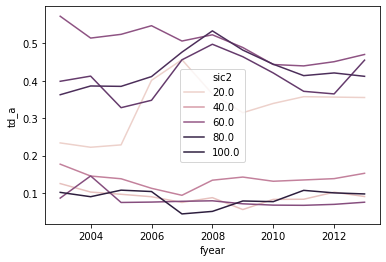

In [20]:
# in the next line: the @ sign tells python to put the variable inside the string
sns.lineplot(data = sic2_year.query('sic2 in @inds_to_examine').reset_index(),
             x = 'fyear', y='td_a', hue='sic2')

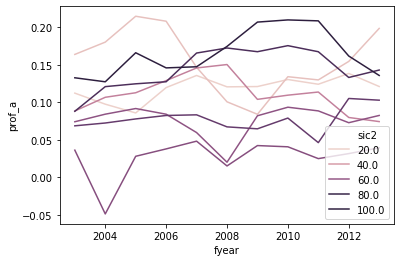

In [21]:
sns.lineplot(data = sic2_year.query('sic2 in @inds_to_examine').reset_index(),
             x = 'fyear', y='prof_a', hue='sic2')

sns.lineplot(', palette=sns.color_palette("Set1", 8))
